In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [209]:
df_tumores = pd.read_csv('com_cores_planilha_excell_tumores_solidos_nao_hematopoieticos_com_todas_as_informacoes.csv', index_col=0, encoding='latin1')
df_tumores

,sample,GROUP,Events:A,Visibility %:A,CD10:A,CD117:A,CD123:A,CD19:A,CD271:A,CD271:A : Color,...,EPCAM:A : Color,GD2:A,GD2:A : Color,nuMIOGENIN:A,nuMIOGENIN:A : Color,nuMYOD:A,nuMYOD:A : Color,OCT3/4:A,SSC-A:A,SSC-H:A
CASE NUMBER,,,,,,,,,,,,,,,,,,,,,
33,mass,Adrenal carcinoma,29998.000,63.64,106.92,88.53,NaN,275.00,365.00,NaN,...,5.0,302.00,4.0,292.00,4.0,140.00,4.0,NaN,7973.28,NaN
643,mass,chondrosarcoma,271871.000,87.62,456.64,419.74,651.24,243.99,240.63,1.0,...,5.0,10884.74,4.0,1090.33,4.0,875.16,4.0,NaN,83670.73,NaN
1445,mass,clear cell sarcoma,1421662.000,98.81,NaN,NaN,648.86,1657.00,86607.40,2.0,...,6.0,3953.64,5.0,600.80,NaN,NaN,NaN,NaN,26350.56,14066.0
1612,mass,cystic nephroma,2901.000,8.39,1818.79,NaN,316.64,395.75,779.71,1.0,...,5.0,392.47,4.0,144.71,4.0,252.83,4.0,NaN,26851.68,NaN
18,mass,Extraesqueletal Ewing Sarcoma,3067.000,28.31,505.78,103.59,NaN,86.73,NaN,NaN,...,5.0,1356.63,4.0,2917.48,4.0,788.16,4.0,NaN,29520.00,15986.0
21,mass,Extraesqueletal Ewing Sarcoma,84801.000,86.78,125.86,51.56,NaN,252.10,2568.85,1.0,...,5.0,49.02,4.0,503.99,4.0,453.65,4.0,NaN,23899.40,NaN
850,mass,Extraesqueletal Ewing Sarcoma,178117.000,68.31,135.00,NaN,137.11,73.43,369.47,1.0,...,5.0,1812.12,5.0,360.08,4.0,279.09,4.0,NaN,21432.96,NaN
36,mass,germ cell tumor,6316.000,8.02,215.48,156.74,NaN,356.62,393.27,1.0,...,5.0,346.13,4.0,168.19,4.0,143.82,4.0,NaN,23945.30,13935.5
37,mass,germ cell tumor,1579.000,15.51,104.77,NaN,NaN,-485.00,425.01,1.0,...,5.0,591.01,4.0,338.01,4.0,229.98,4.0,NaN,21900.96,13414.5


In [210]:
markers_dict = {'CD271:A': 'CD271:A : Color',
                'CD81:A': 'CD81:A : Color',
                'CD99:A': 'CD99:A : Color',
                'EPCAM:A': 'EPCAM:A : Color',
                'GD2:A': 'GD2:A : Color',
                'nuMIOGENIN:A': 'nuMIOGENIN:A : Color',
                'nuMYOD:A': 'nuMYOD:A : Color'}

In [211]:
id_to_name = {1:'PE', 2:'HV', 3:'APC-H7', 4:'FITC', 5:'APC', 6:'PERCPcy5.5'}

In [212]:
id_to_colors = {1:'yellow', 2:'magenta', 3:'grey', 4:'green', 5:'blue', 6:'red'}

In [213]:
def plot_colors_1d(colors_df, marker_column, color_column):
    for i in range(0, len(colors_df)):
        color_id = int(colors_df[i][color_column].iloc[0])
        cur_df = colors_df[i][marker_column]
        plt.scatter(([i*0.01]*len(cur_df)), cur_df, color=id_to_colors[color_id], label=id_to_name[color_id])
        
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.axhline(0, color='black', linestyle='--')
    plt.title(marker_column)
    plt.legend()
    plt.ylabel('Fluorescence', fontsize=16)
    plt.show()

### 1D Plot - Marker Fluorescence

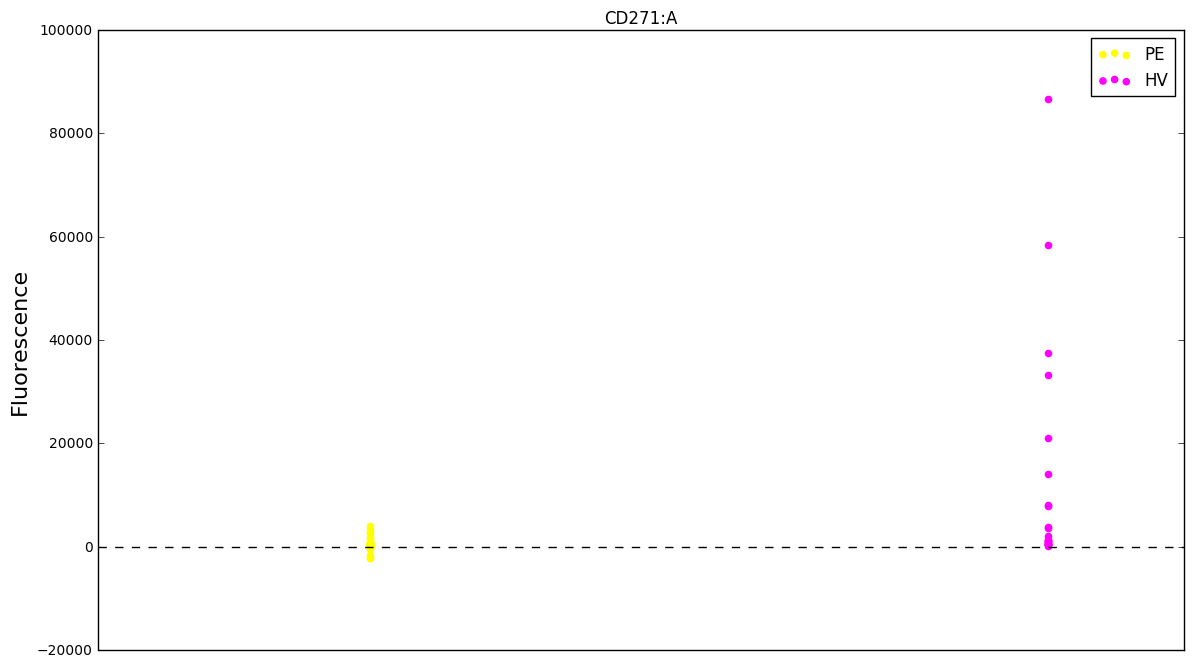

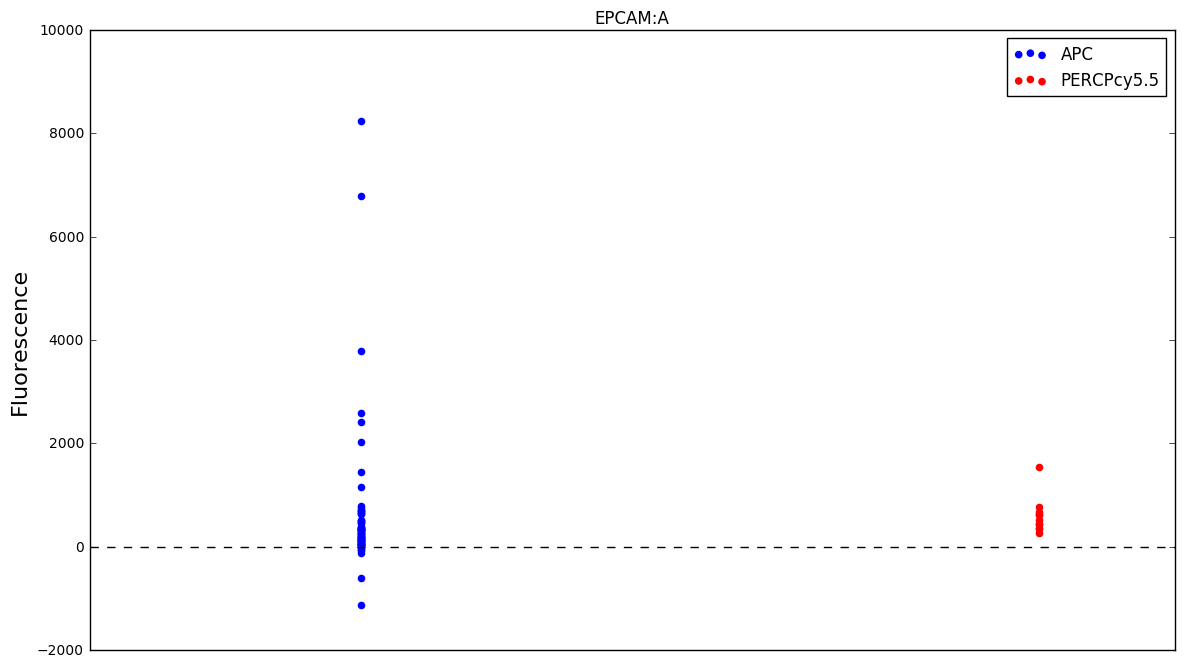

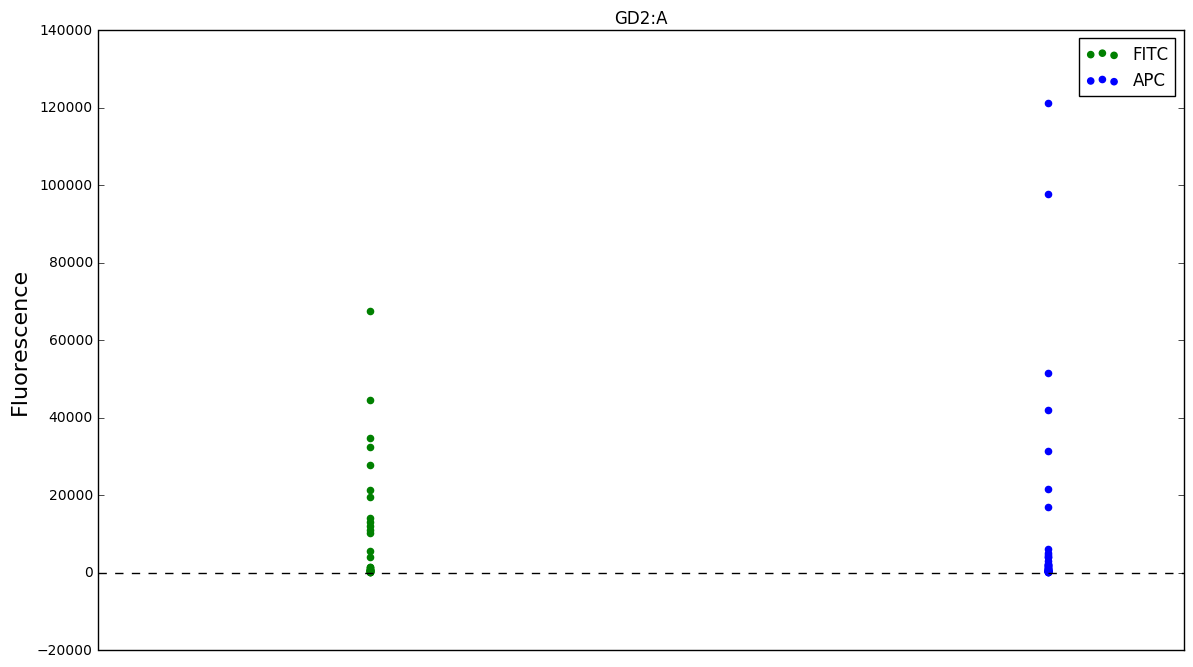

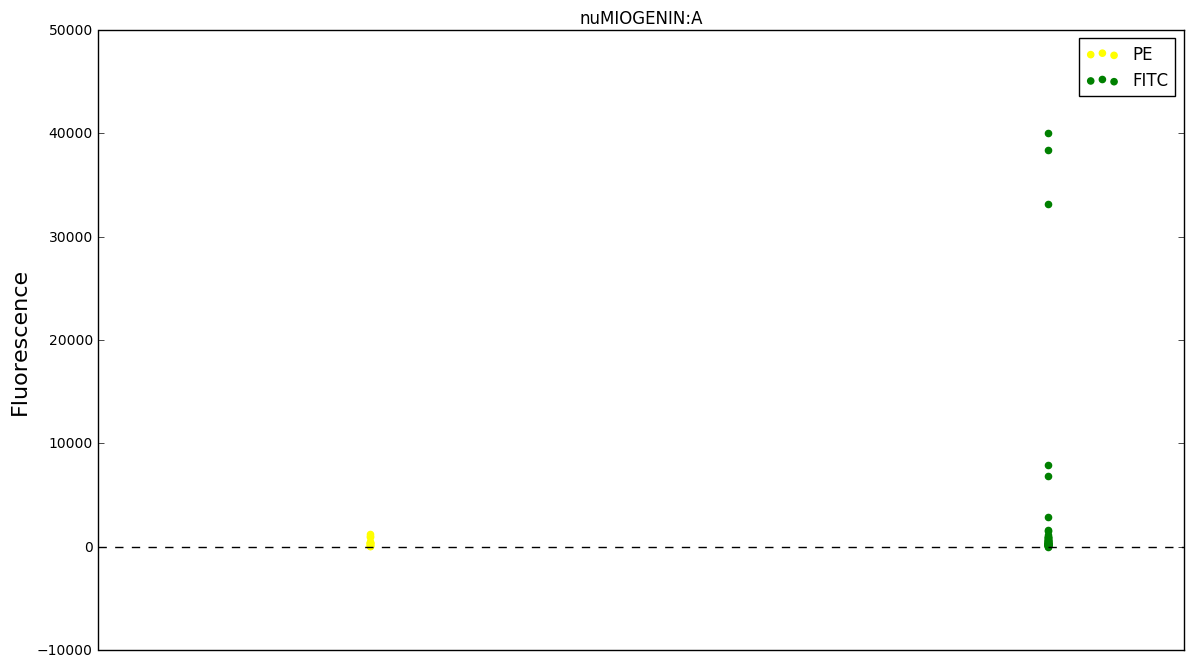

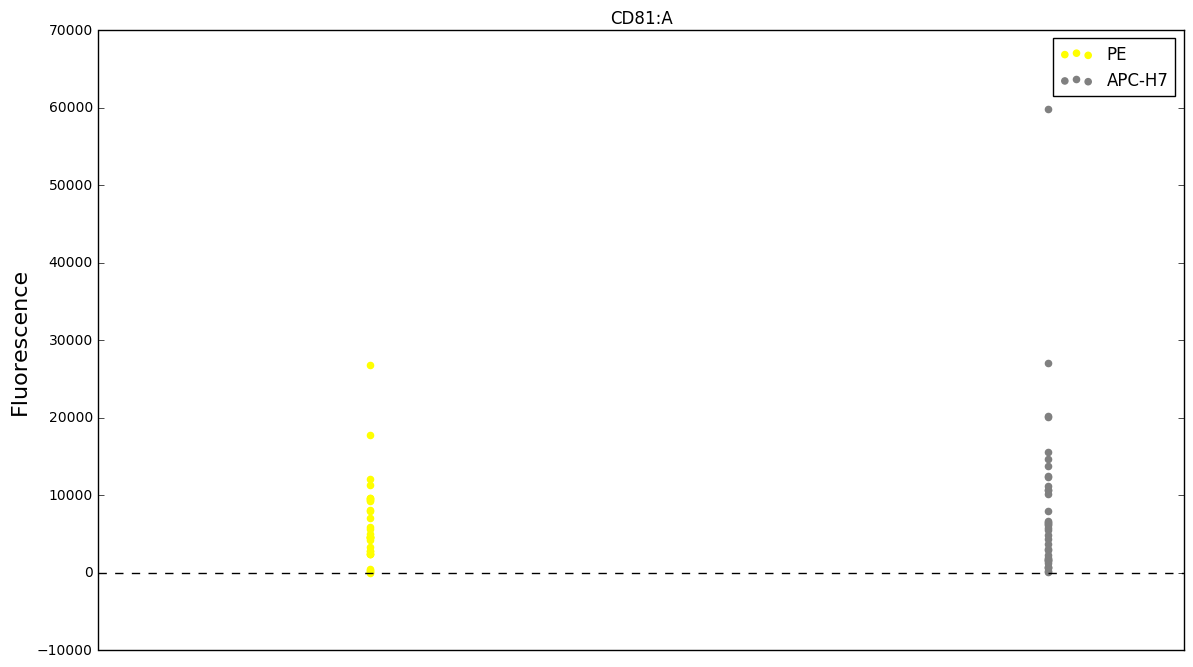

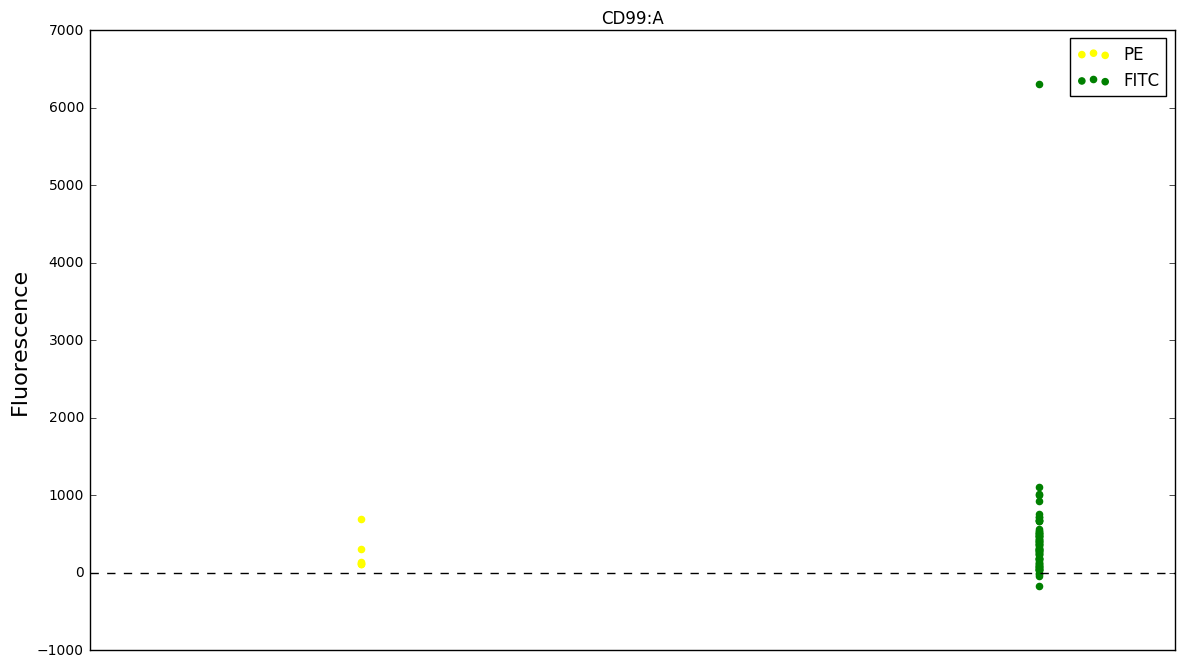

In [214]:
for key, value in markers_dict.iteritems():
    df_loop = df_tumores[df_tumores[key].notnull() & df_tumores[value].notnull()]
    colors_df = []
    grouped = df_loop.groupby([value])
    for name, group in grouped:
        colors_df.append(group)
        
    if len(colors_df) >= 2:
        plot_colors_1d(colors_df, key, value)

### 2D Plot - Marker Fluorence

In [215]:
def plot_colors_2d(colors_df, marker_column, color_column):
    quantities = 'Events:A'
    for i in range(0, len(colors_df)):
        color_id = int(colors_df[i][color_column].iloc[0])
        cur_df_y = colors_df[i][marker_column]
        cur_df_x = colors_df[i][quantities]
        plt.scatter(cur_df_x, cur_df_y, color=id_to_colors[color_id], label=id_to_name[color_id])
        
    plt.xlabel('Number of Cells', fontsize=16)
    plt.ylabel('Fluorescence', fontsize=16)
    plt.axhline(0, color='black', linestyle='--')
    plt.xlim((0,2000000))
    plt.title(marker_column)
    plt.legend()
    plt.show()

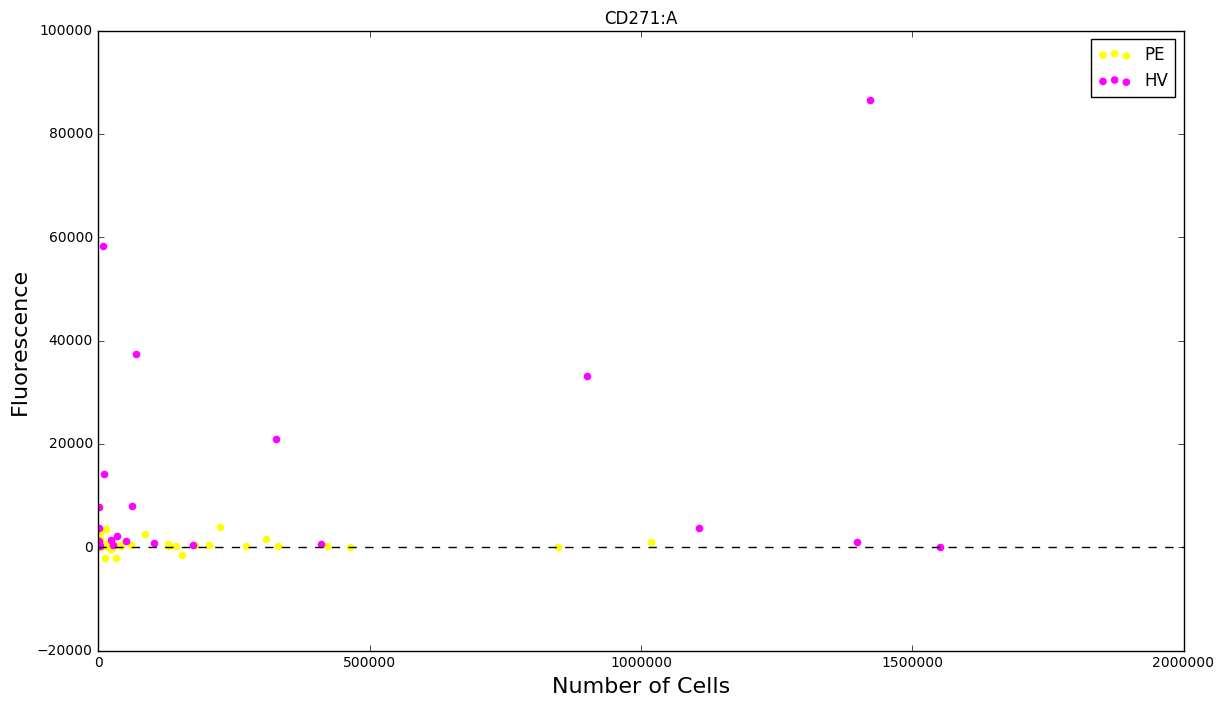

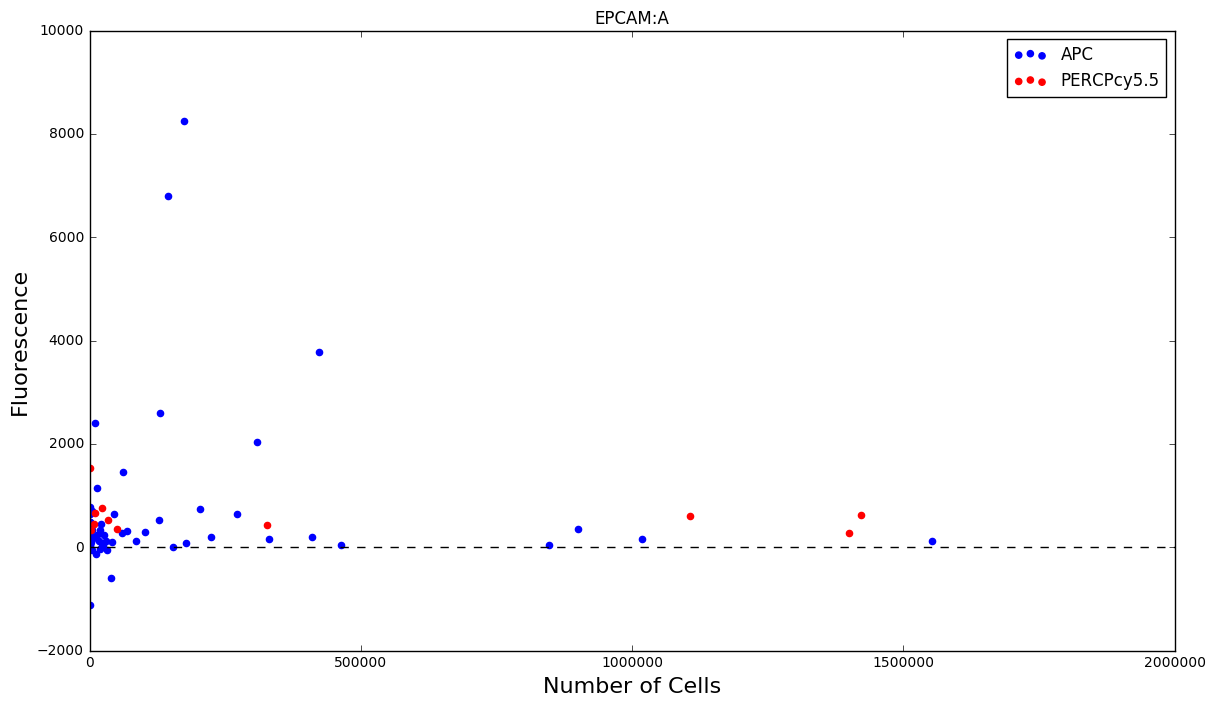

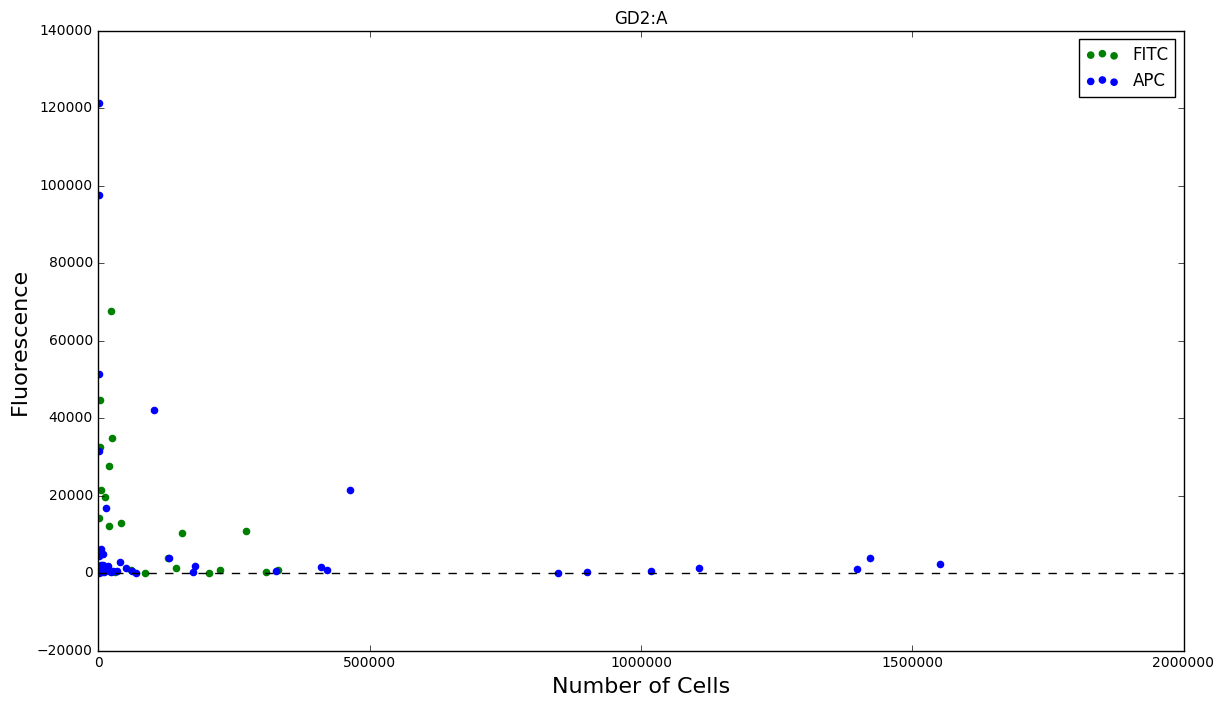

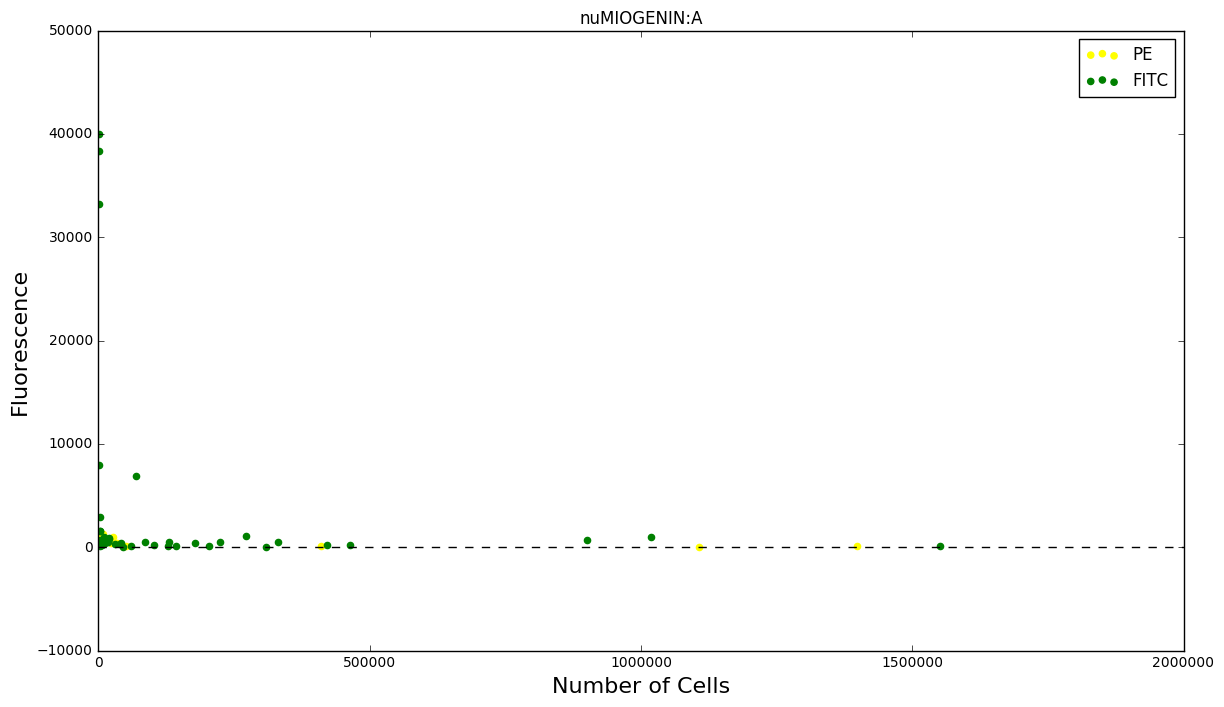

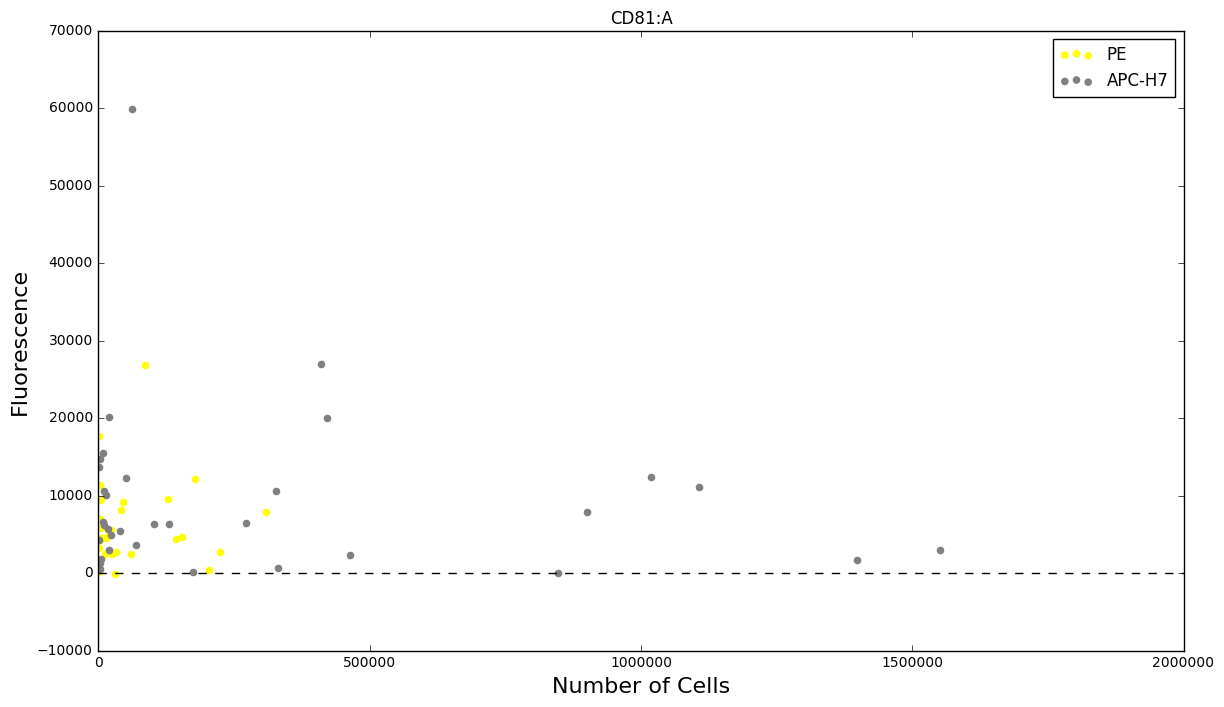

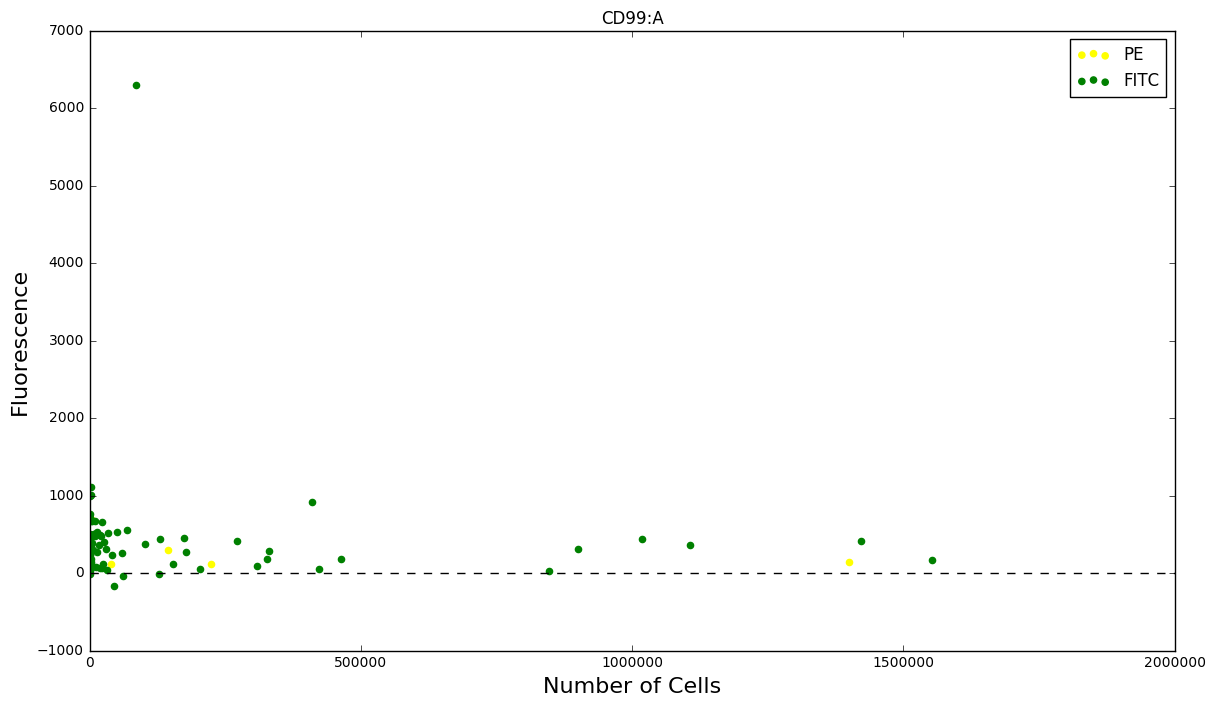

In [216]:
for key, value in markers_dict.iteritems():
    df_loop = df_tumores[df_tumores[key].notnull() & df_tumores[value].notnull()]
    colors_df = []
    grouped = df_loop.groupby([value])
    for name, group in grouped:
        colors_df.append(group)
        
    if len(colors_df) >= 2:
        plot_colors_2d(colors_df, key, value)